#### MCMC from scratch

https://twiecki.io/blog/2015/11/10/mcmc-sampling/

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

sns.set_style('white')
sns.set_context('talk')

np.random.seed(123)

In [2]:
data = np.random.randn(20)

(array([1., 1., 1., 4., 3., 2., 1., 3., 2., 2.]),
 array([-2.42667924, -1.96341831, -1.50015738, -1.03689645, -0.57363551,
        -0.11037458,  0.35288635,  0.81614728,  1.27940822,  1.74266915,
         2.20593008]),
 <a list of 10 Patch objects>)

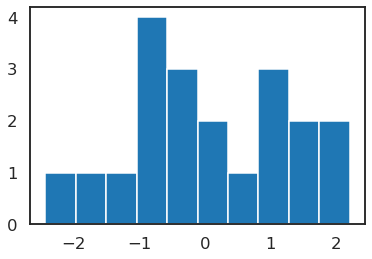

In [6]:
plt.hist(data)

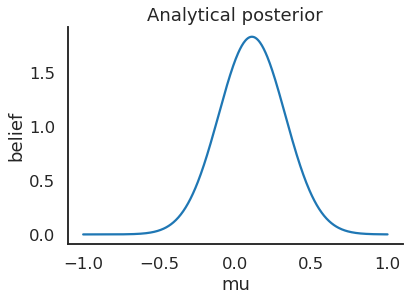

In [7]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

ax = plt.subplot()
x = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, x, 0., 1.)
ax.plot(x, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior');
sns.despine()

# mcmc

In [8]:
mu_current = 1.

In [12]:
mu_current

1.0

In [11]:
proposal = norm(mu_current, 1.2).rvs()

In [15]:
mu_proposal = proposal

In [ ]:
likelihood_current = norm(mu_current, 1).pdf(data).prod()
likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()

# Compute prior probability of current and proposed mu        
prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)

# Nominator of Bayes formula
p_current = likelihood_current * prior_current
p_proposal = likelihood_proposal * prior_proposal